In [ ]:
# Problem: spam email detection

In [ ]:
# data comes from https://archive.ics.uci.edu/dataset/94/spambase

In [65]:
import numpy as np
import pandas as pd

# Load the Spambase dataset
#data = pd.read_csv('spambase.data')
data = pd.read_csv('D:/PolyU/课程/大四/EIE4121/Project/Spam-Emails-Detection/dataset/spambase/spambase.data')
# Fill missing values with the mean of each column
data = data.fillna(data.mean())

column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'spam'
]

# Assign column names to the dataset
data.columns = column_names

# 定义要删除的特征列表
""" features_to_drop = [
    'word_freq_labs', 'word_freq_credit', 'word_freq_make',
    'word_freq_address', 'word_freq_order', 'word_freq_technology',
    'char_freq_#', 'word_freq_pm', 'word_freq_people', 'word_freq_85',
    'word_freq_data', 'word_freq_font', 'char_freq_[', 'word_freq_report',
    'word_freq_project', 'word_freq_lab', 'word_freq_telnet', 'word_freq_original',
    'word_freq_conference', 'word_freq_cs', 'word_freq_direct', 'word_freq_addresses',
    'word_freq_3d', 'word_freq_857', 'word_freq_415', 'word_freq_parts', 'word_freq_table'
] """

# 定义要删除的所有特征的大列表
all_features_to_drop = [
    'word_freq_labs', 'word_freq_credit', 'word_freq_make',
    'word_freq_address', 'word_freq_order', 'word_freq_technology',
    'char_freq_#', 'word_freq_pm', 'word_freq_people', 'word_freq_85',
    'word_freq_data', 'word_freq_font', 'char_freq_[', 'word_freq_report',
    'word_freq_project', 'word_freq_lab', 'word_freq_telnet', 'word_freq_original',
    'word_freq_conference', 'word_freq_cs', 'word_freq_direct', 'word_freq_addresses',
    'word_freq_3d', 'word_freq_857', 'word_freq_415', 'word_freq_parts', 'word_freq_table',
    # 新增要删除的特征
    'word_freq_edu', 'word_freq_hpl', 'word_freq_1999', 'char_freq_(',
    'word_freq_internet', 'word_freq_will', 'word_freq_all', 'word_freq_business',
    'word_freq_re', 'word_freq_email', 'word_freq_mail', 'word_freq_receive',
    'word_freq_over', 'word_freq_650', 'word_freq_meeting', 'char_freq_;'
]

# 删除这些特征
data.drop(features_to_drop, axis=1, inplace=True)


In [66]:
data.spam.value_counts()
#1是spam 0是not spam

spam
0    2788
1    1812
Name: count, dtype: int64

In [67]:
# Perform statistical analysis
statistics = data.describe()
print(statistics)

       word_freq_all  word_freq_our  word_freq_over  word_freq_remove  \
count    4600.000000    4600.000000     4600.000000       4600.000000   
mean        0.280578       0.312222        0.095922          0.114233   
std         0.504170       0.672586        0.273850          0.391480   
min         0.000000       0.000000        0.000000          0.000000   
25%         0.000000       0.000000        0.000000          0.000000   
50%         0.000000       0.000000        0.000000          0.000000   
75%         0.420000       0.382500        0.000000          0.000000   
max         5.100000      10.000000        5.880000          7.270000   

       word_freq_internet  word_freq_mail  word_freq_receive  word_freq_will  \
count         4600.000000     4600.000000        4600.000000     4600.000000   
mean             0.105317        0.239465           0.059837        0.541680   
std              0.401112        0.644816           0.201565        0.861791   
min              0.000

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# 假设data已经正确加载
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]   # 标签

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 准备一个数组来收集每一折的特征重要性
feature_importances = np.zeros(X.shape[1])

# 通过KFold循环来交叉验证
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 在这一折的数据上训练随机森林
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(X_train, y_train)
    
    # 累加这一折的特征重要性
    feature_importances += forest.feature_importances_

# 求出平均特征重要性
feature_importances /= kf.n_splits

# 创建一个DataFrame来显示特征和它们的重要性
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# 按重要性对特征进行排序
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# 打印特征重要性
print(feature_importance_df)

                       feature  importance
25                 char_freq_!    0.137592
3             word_freq_remove    0.100081
26                 char_freq_$    0.095951
8               word_freq_free    0.079751
28  capital_run_length_longest    0.065327
27  capital_run_length_average    0.064057
12              word_freq_your    0.046339
15                word_freq_hp    0.045471
14             word_freq_money    0.044464
29    capital_run_length_total    0.042643
13               word_freq_000    0.030983
1                word_freq_our    0.026426
11               word_freq_you    0.025768
17            word_freq_george    0.021219
22               word_freq_edu    0.018646
16               word_freq_hpl    0.017711
19              word_freq_1999    0.014730
24                 char_freq_(    0.014670
4           word_freq_internet    0.012744
7               word_freq_will    0.012496
0                word_freq_all    0.011030
9           word_freq_business    0.010701
21         

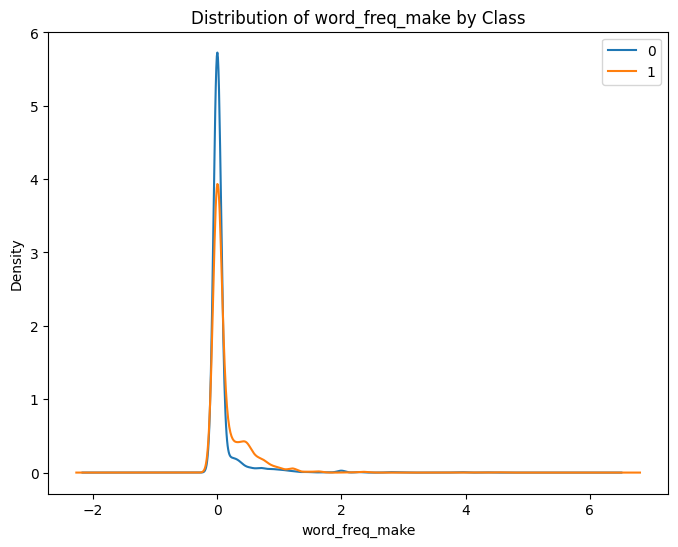

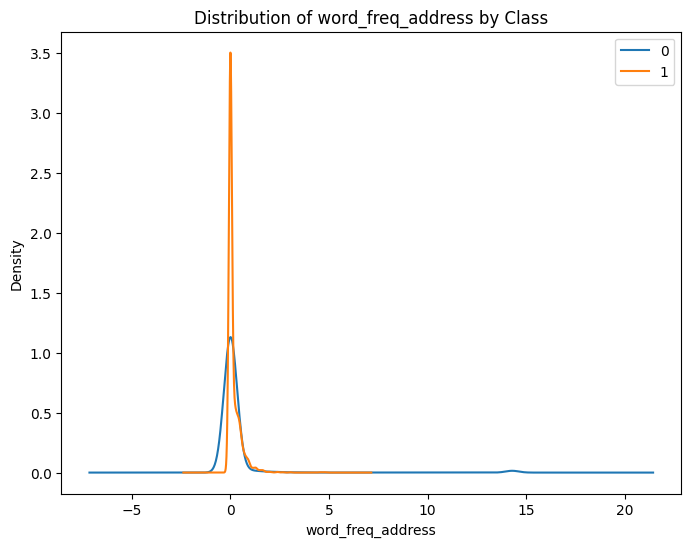

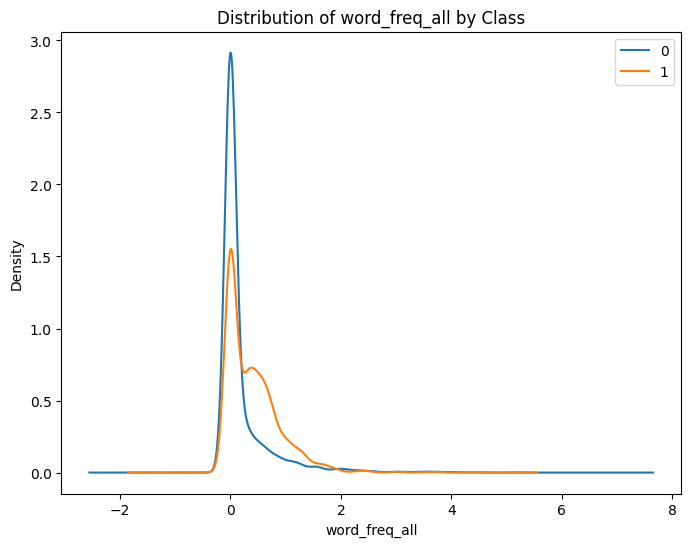

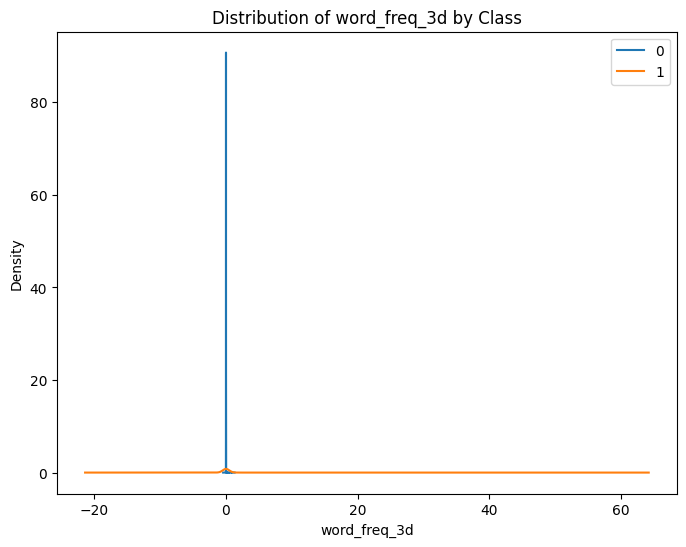

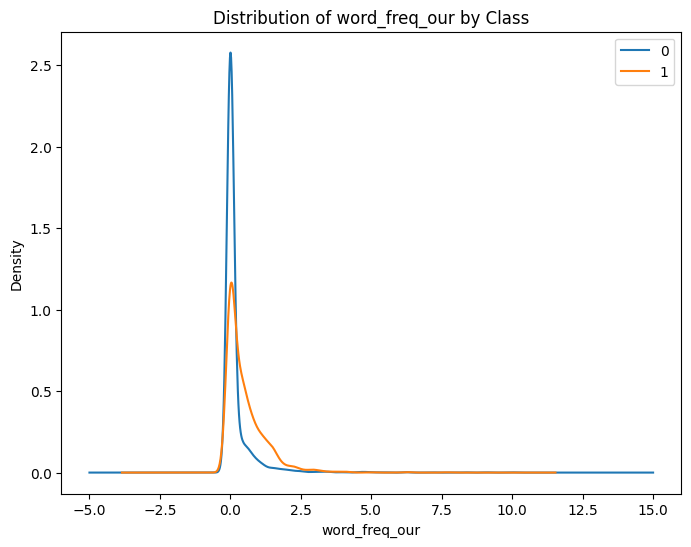

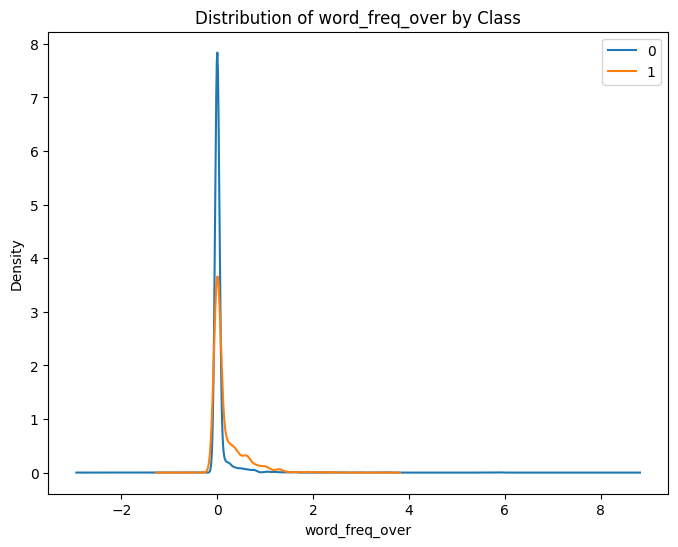

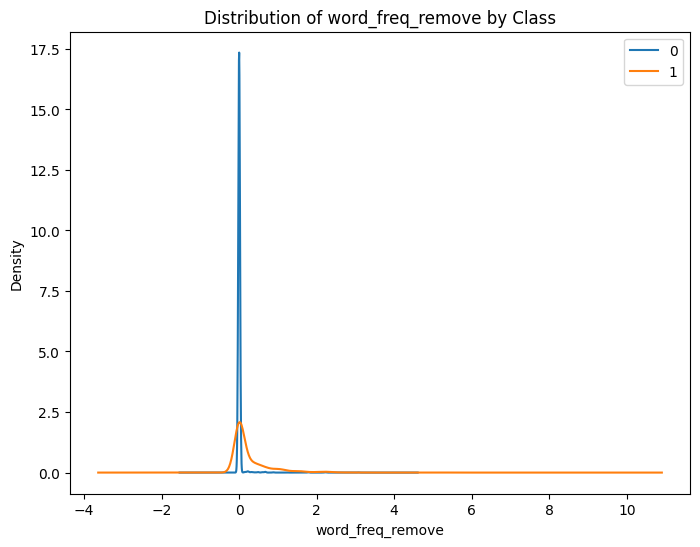

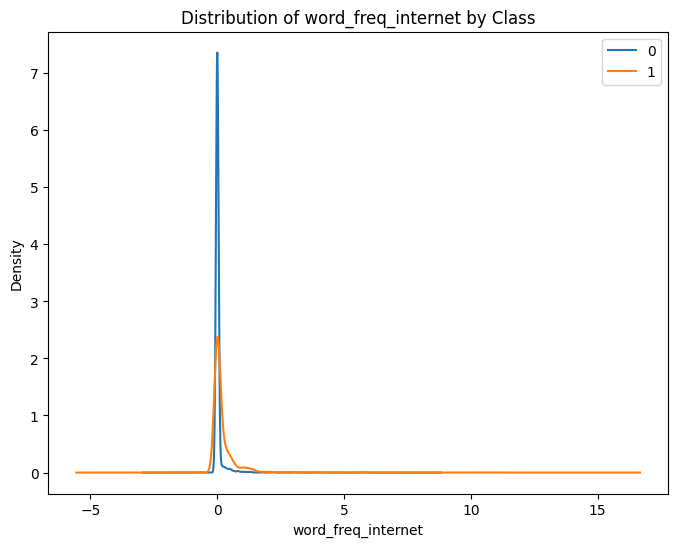

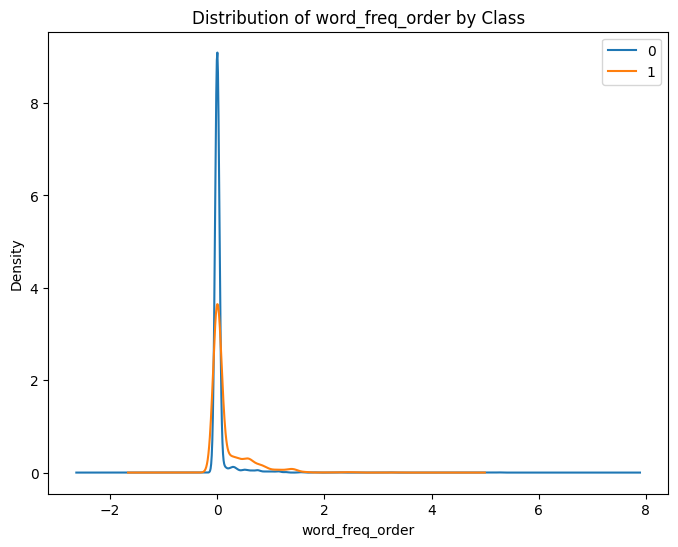

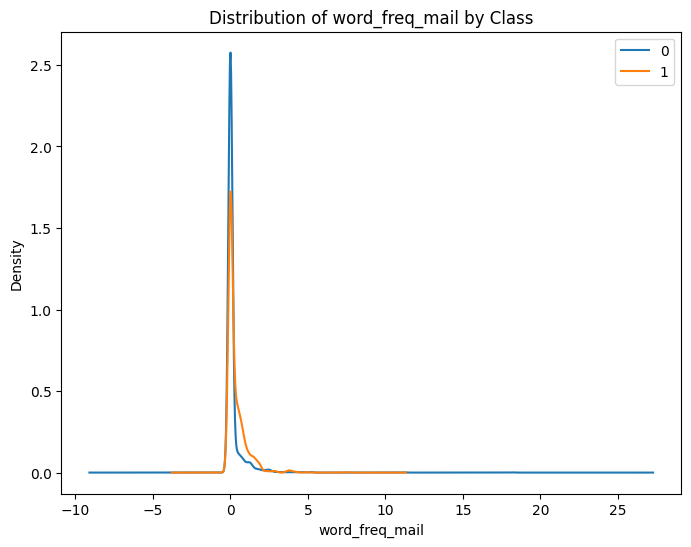

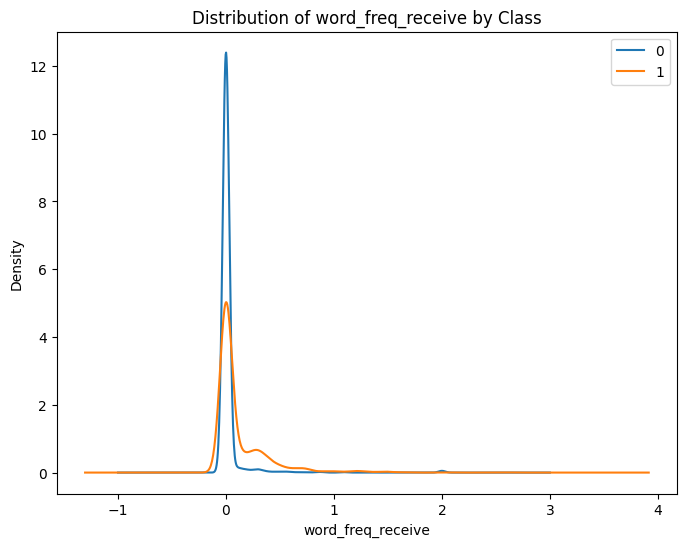

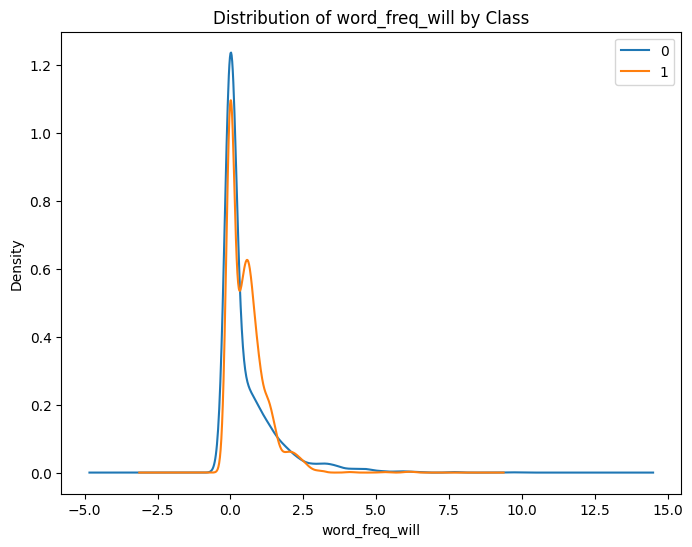

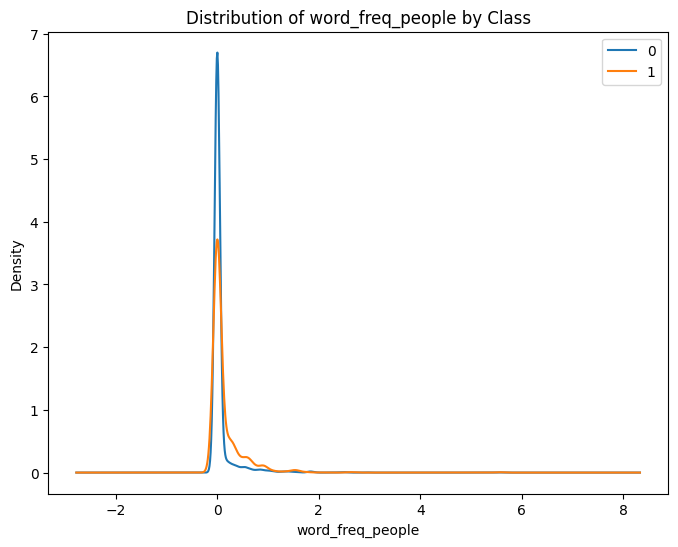

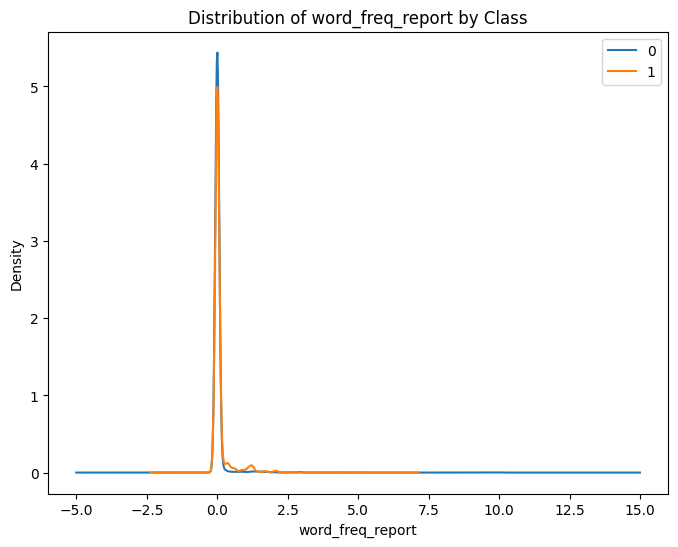

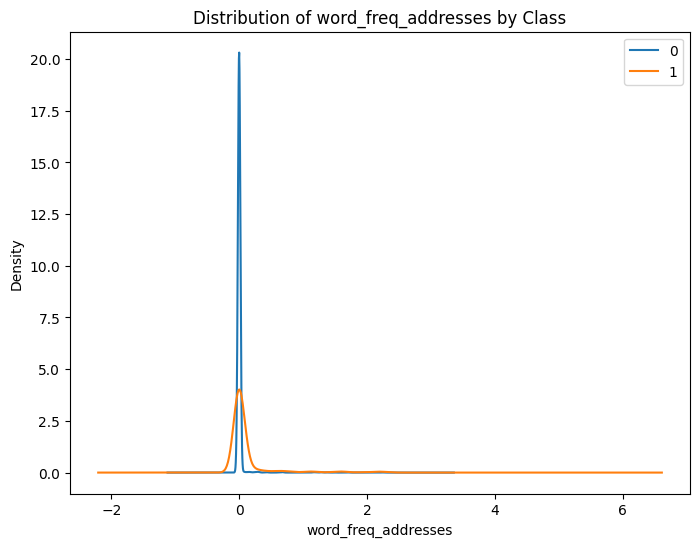

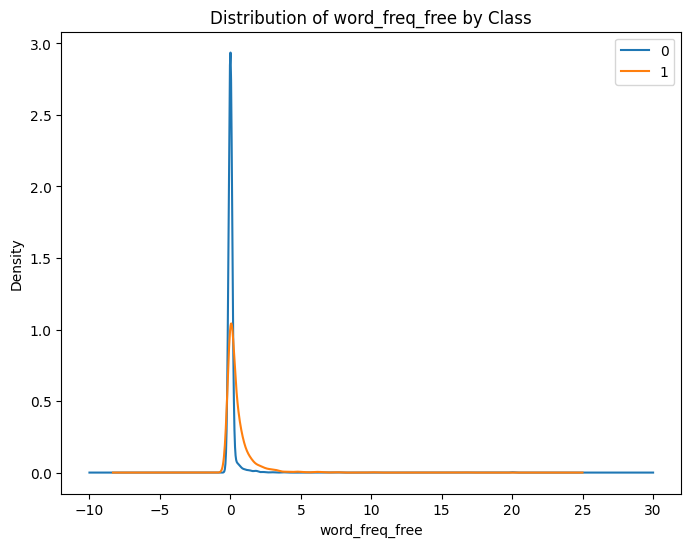

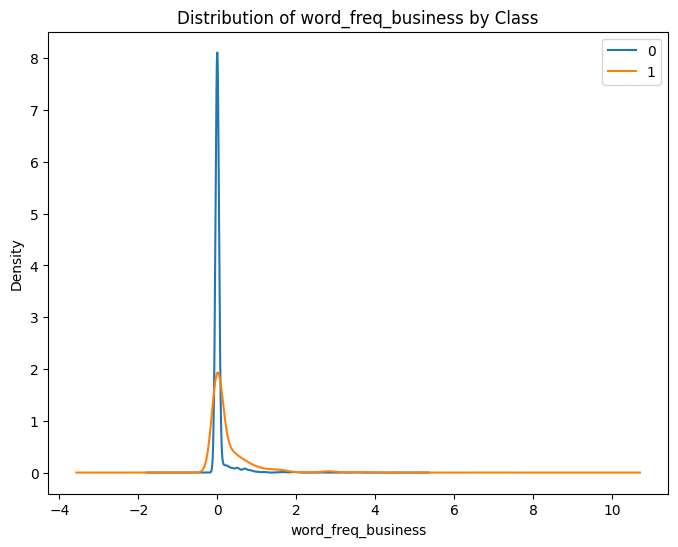

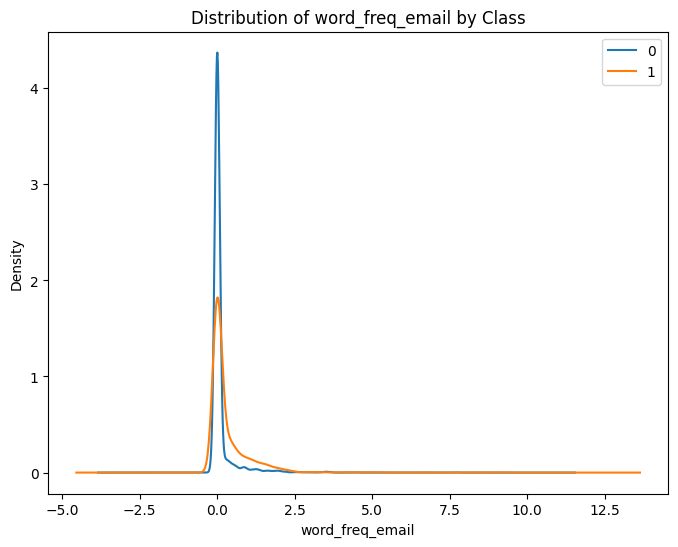

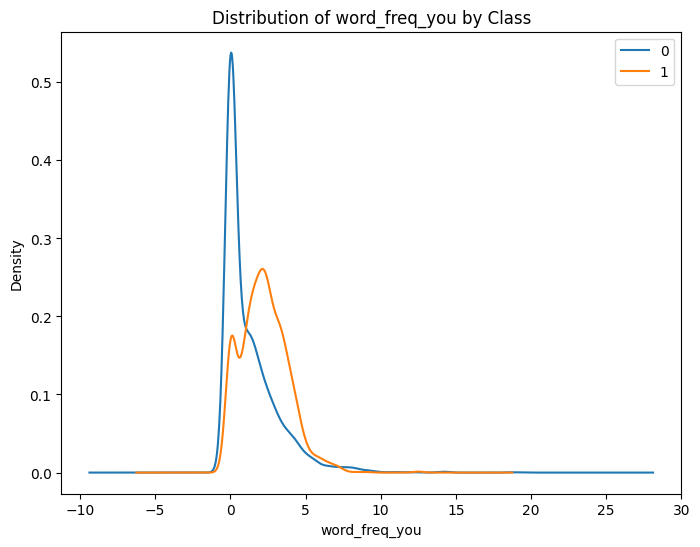

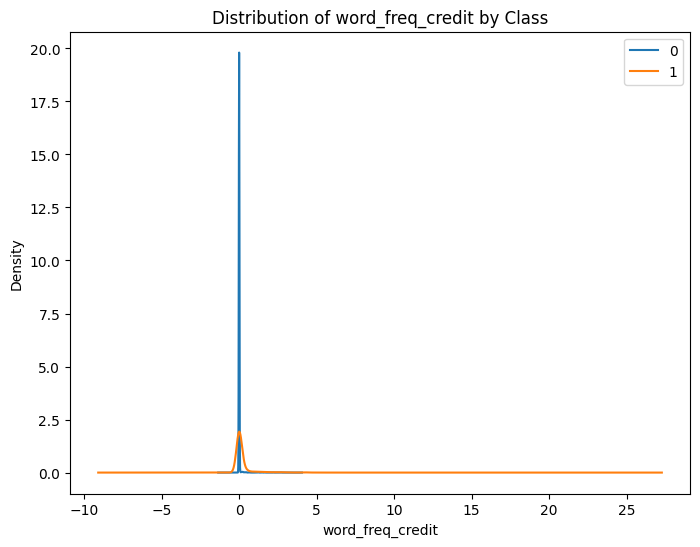

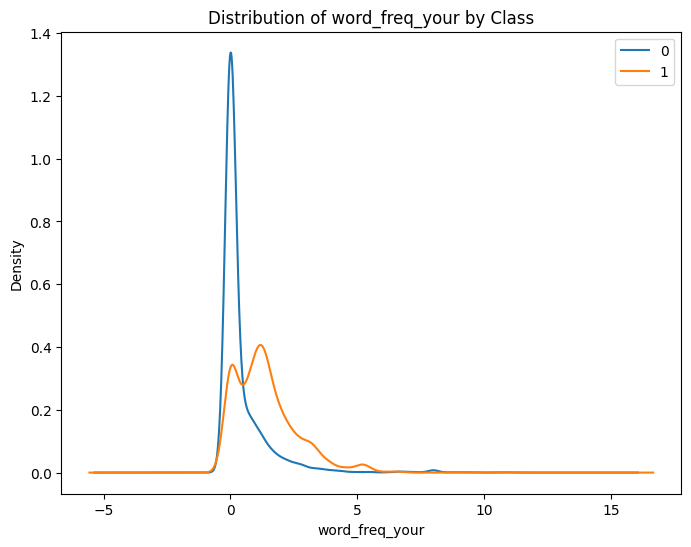

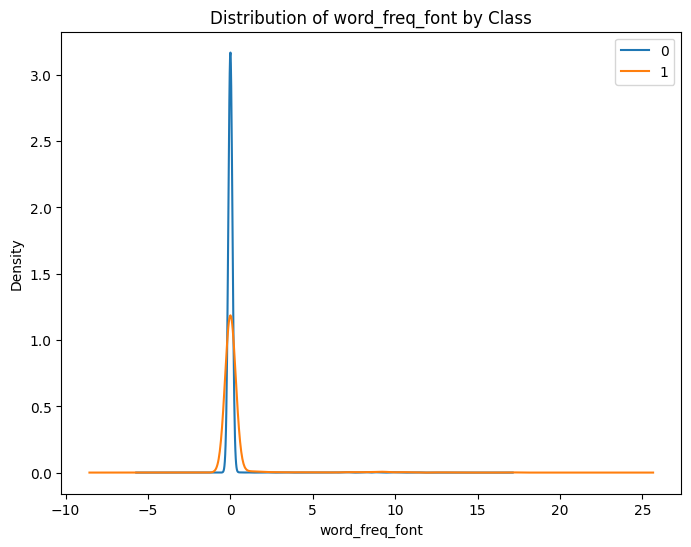

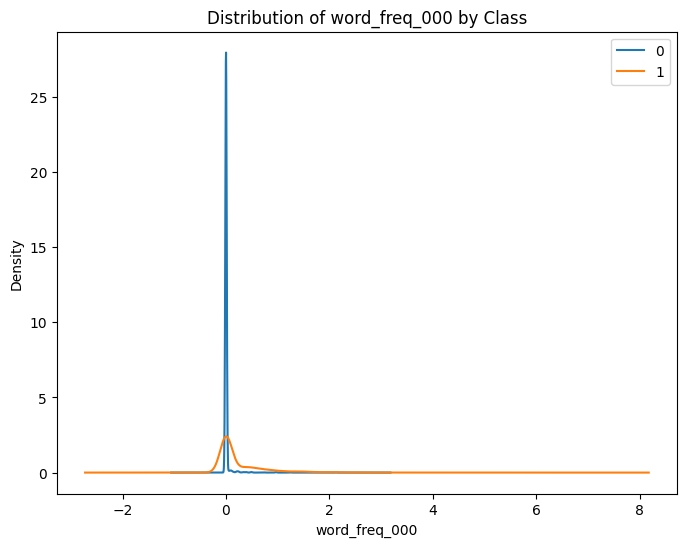

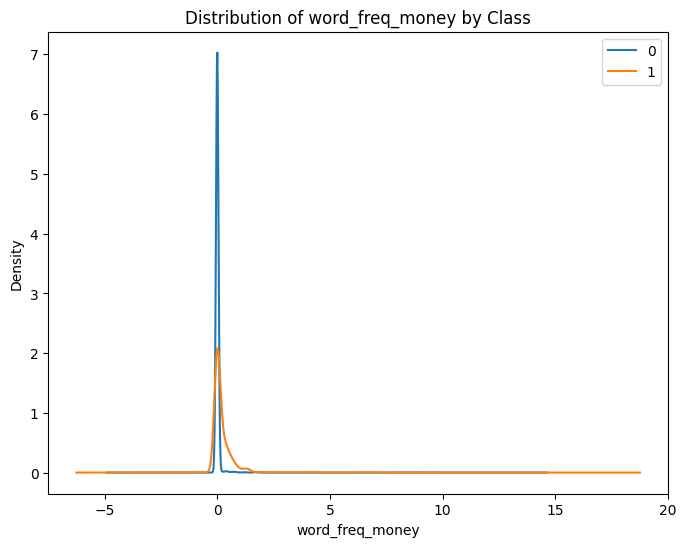

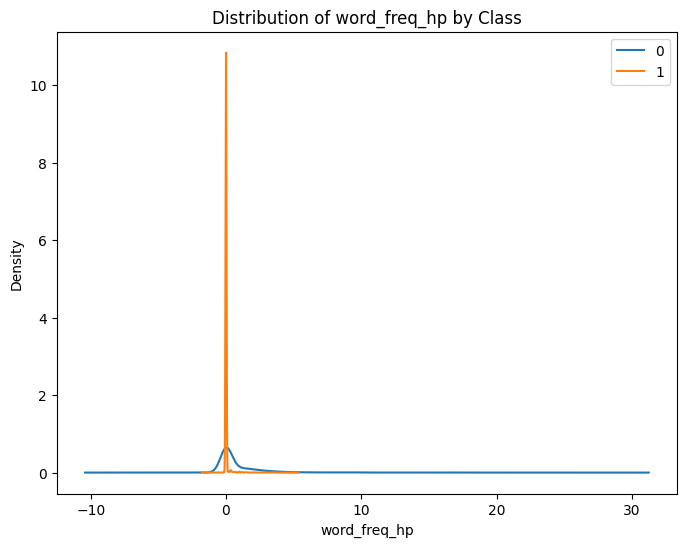

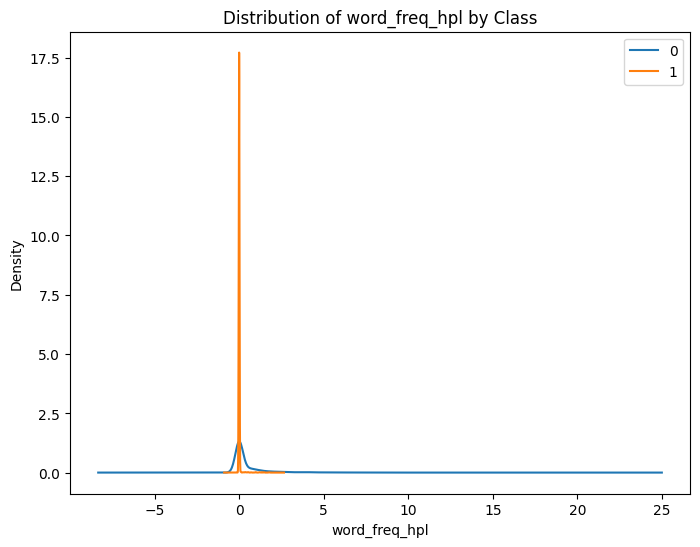

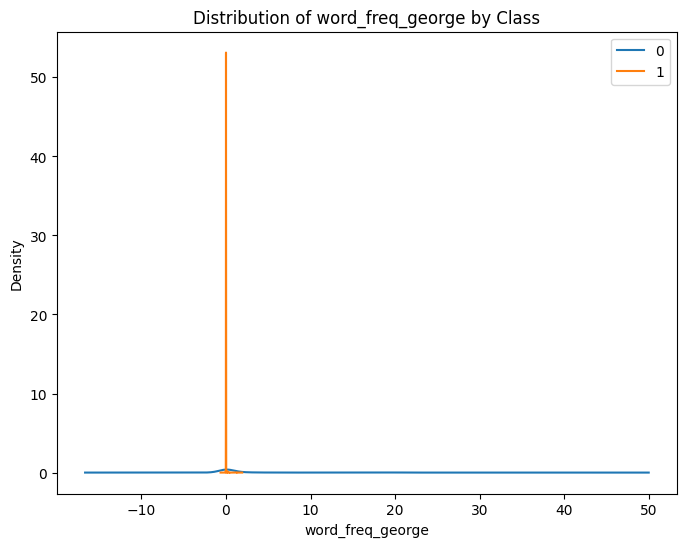

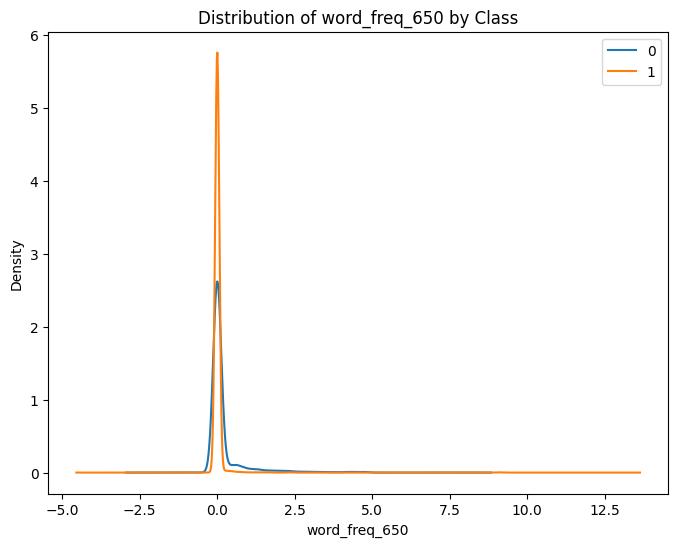

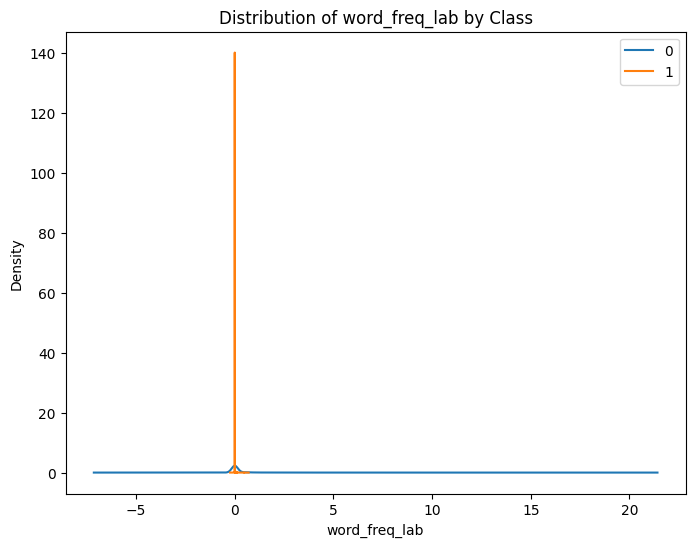

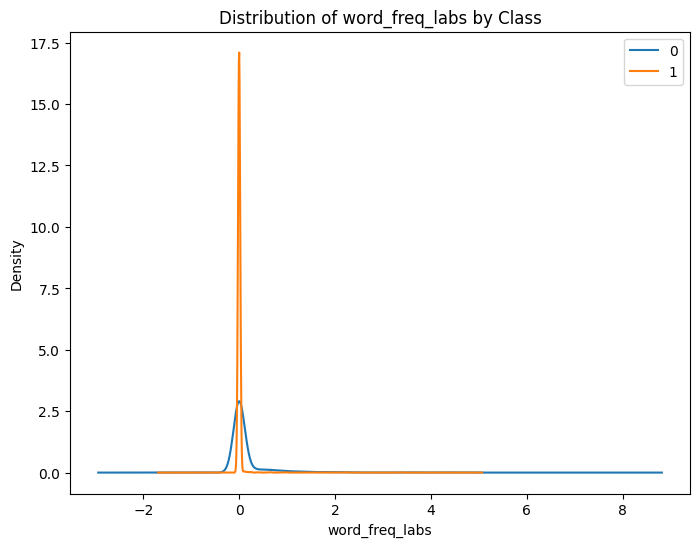

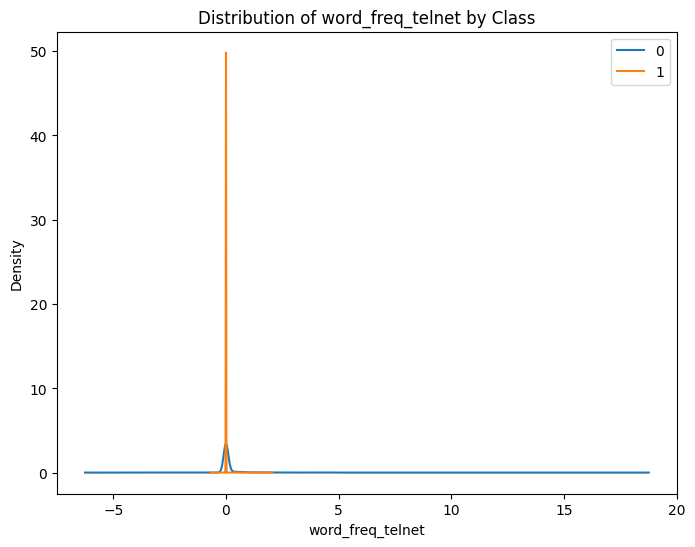

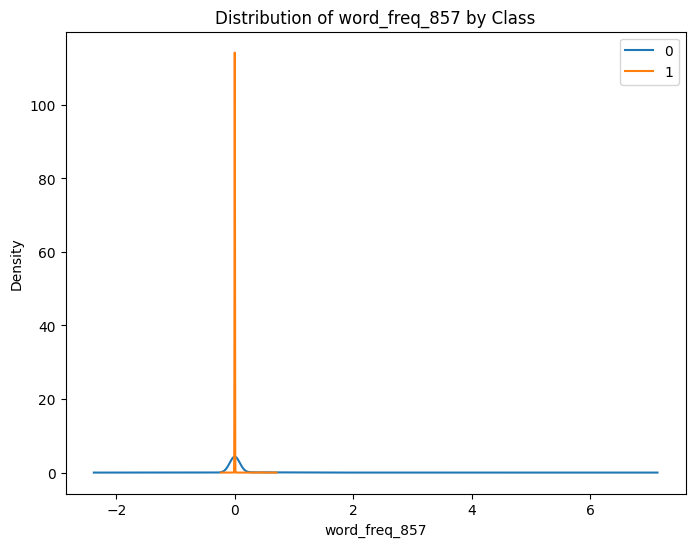

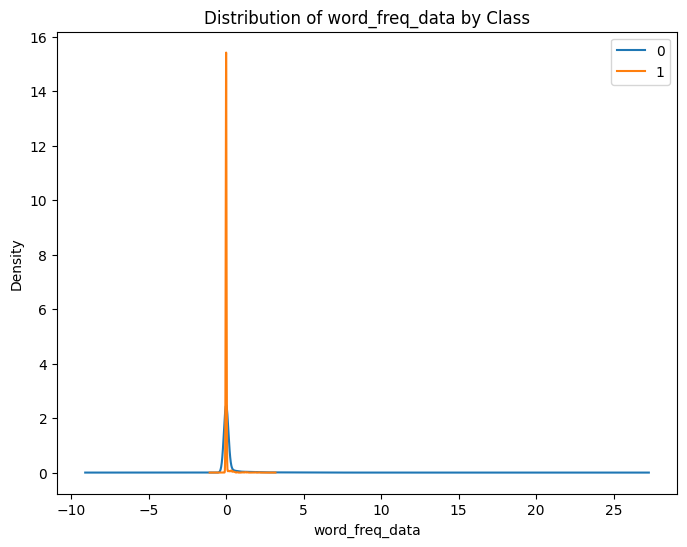

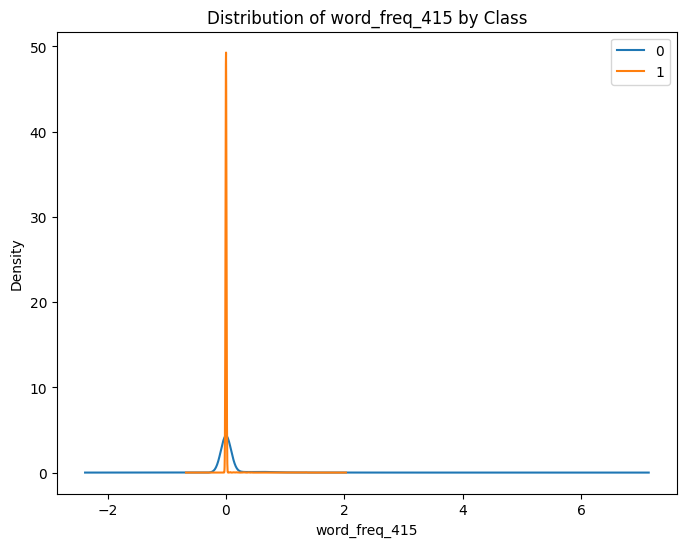

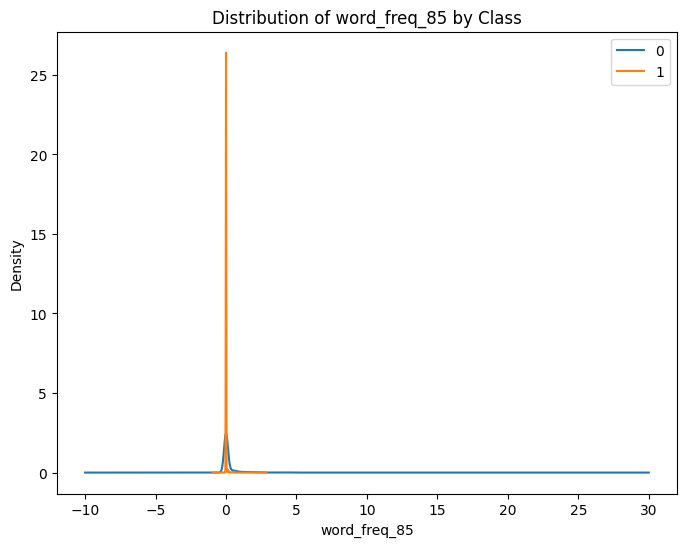

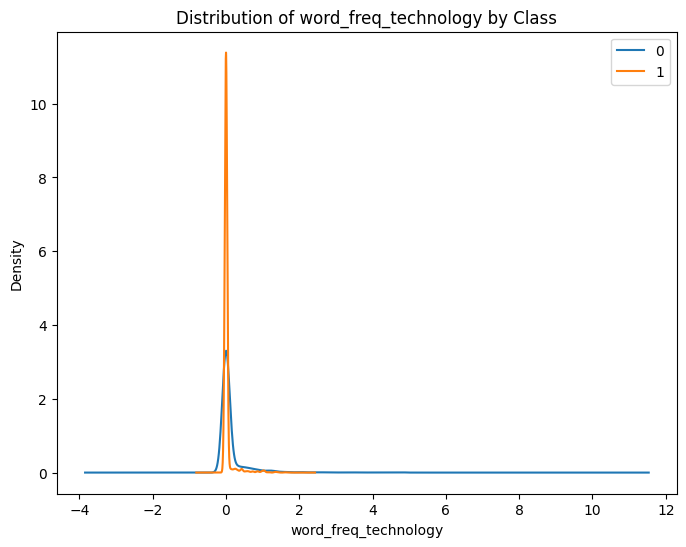

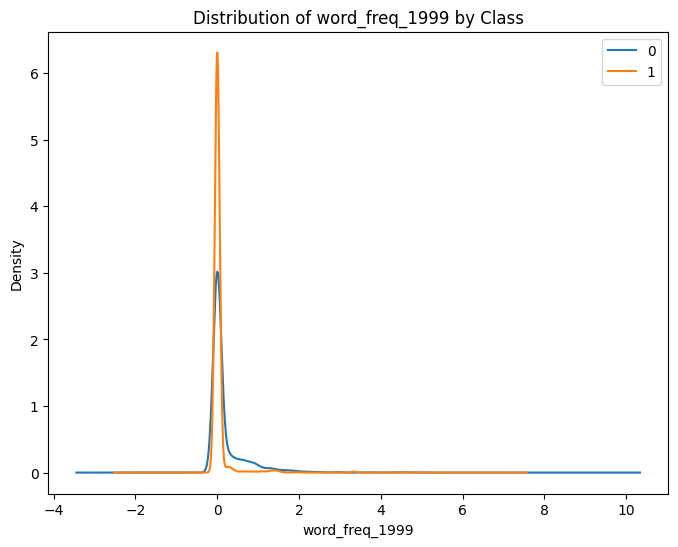

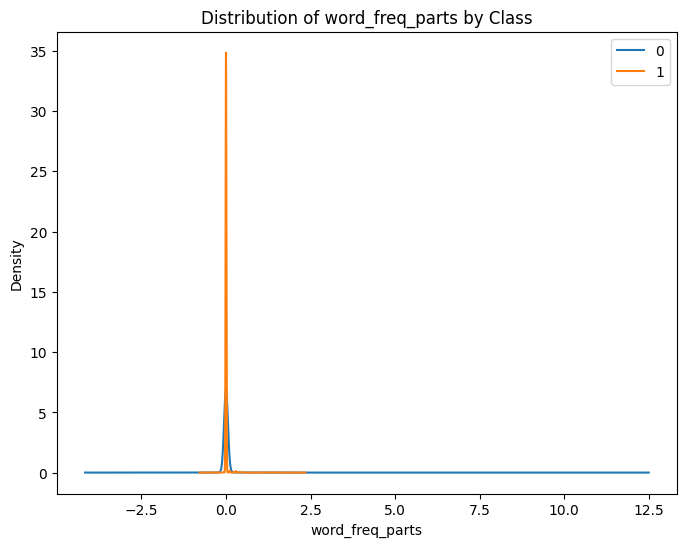

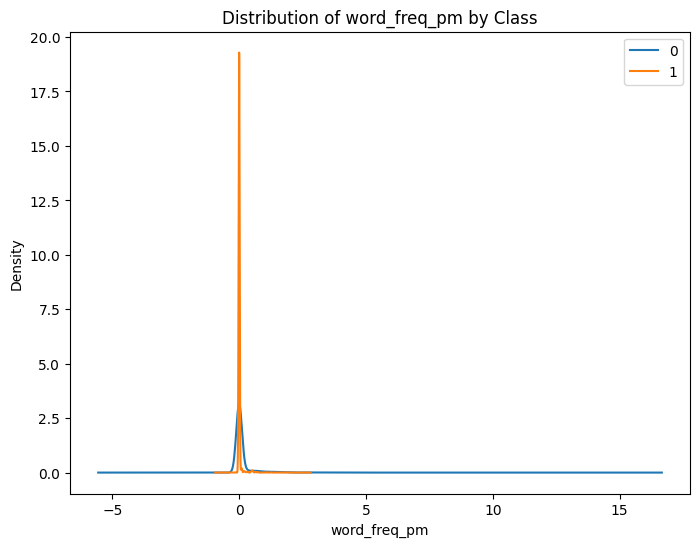

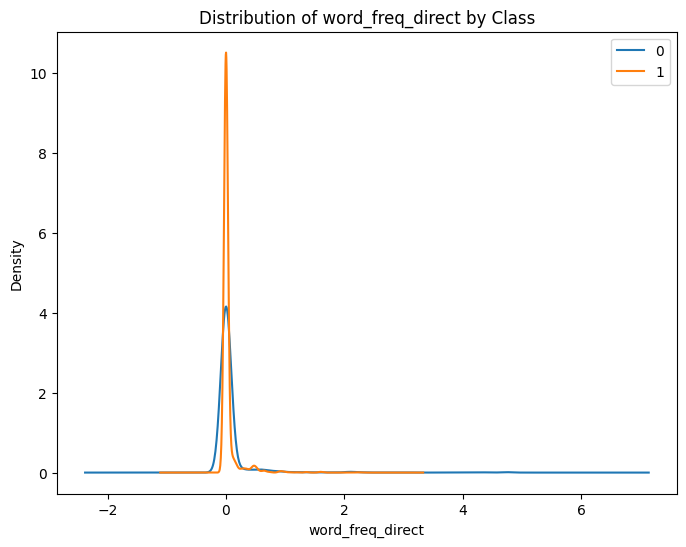

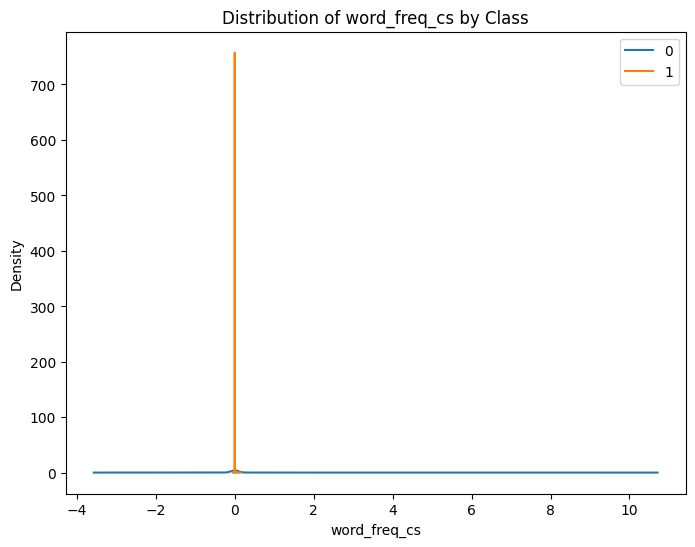

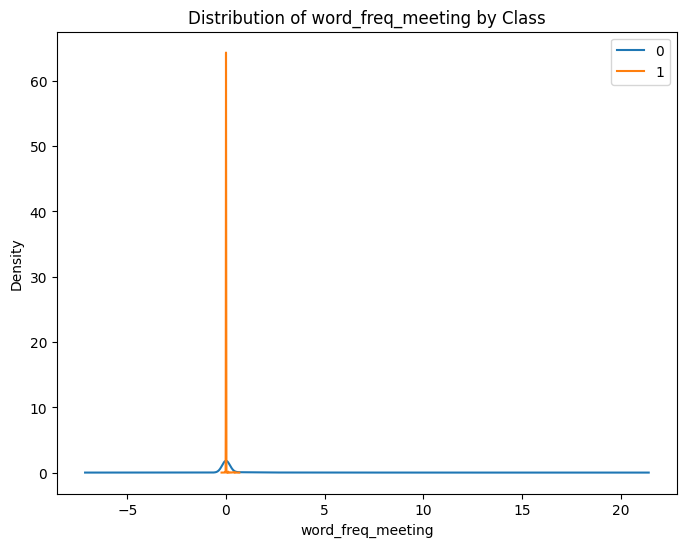

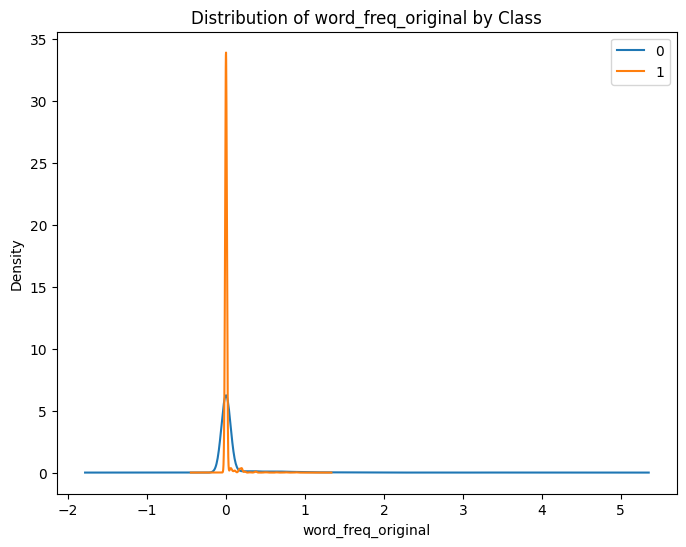

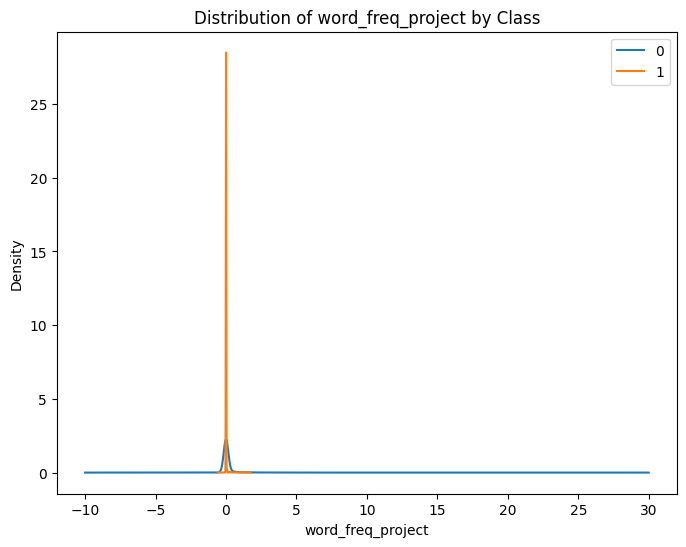

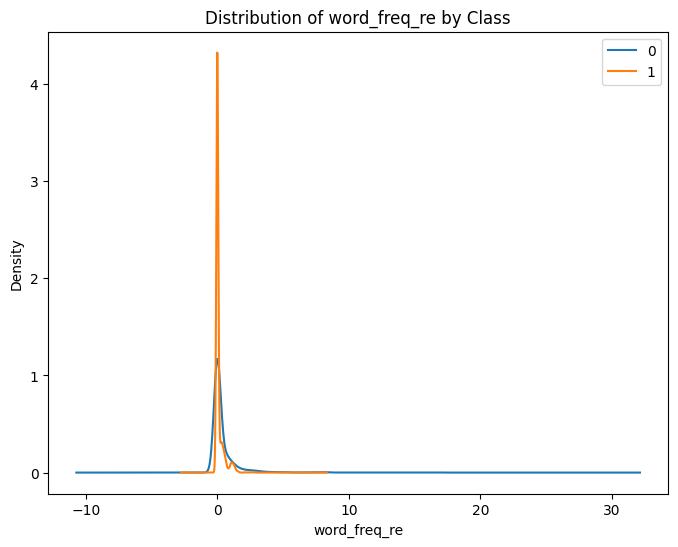

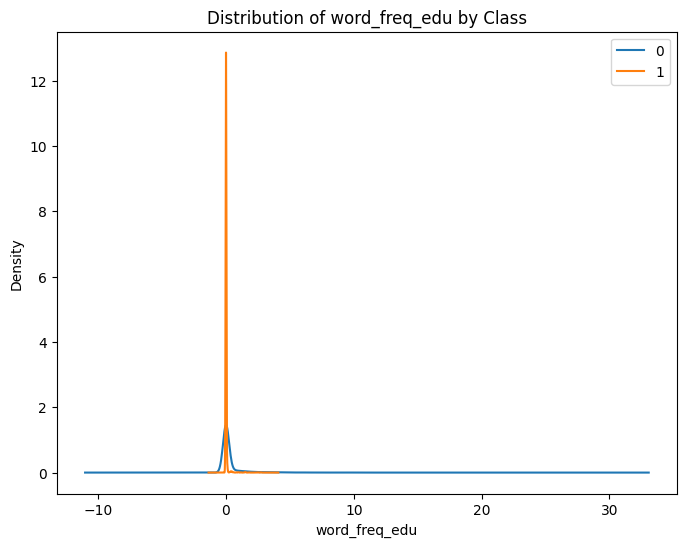

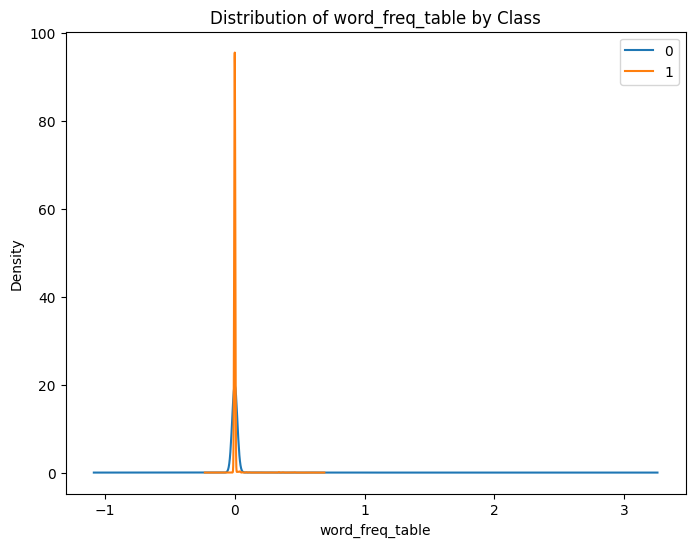

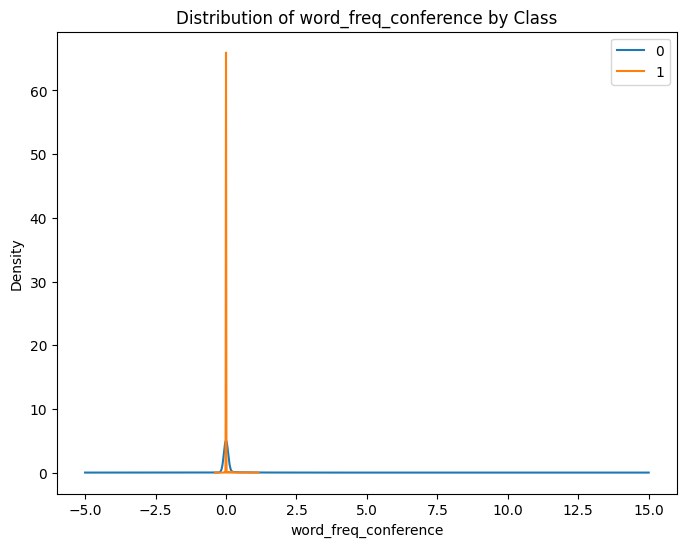

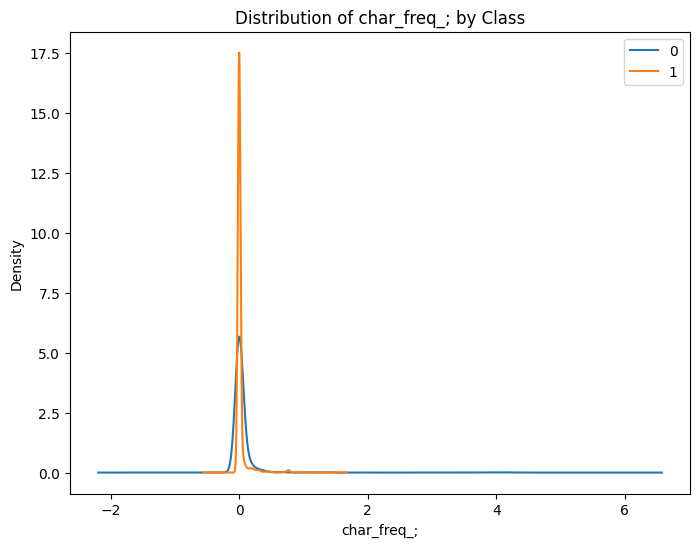

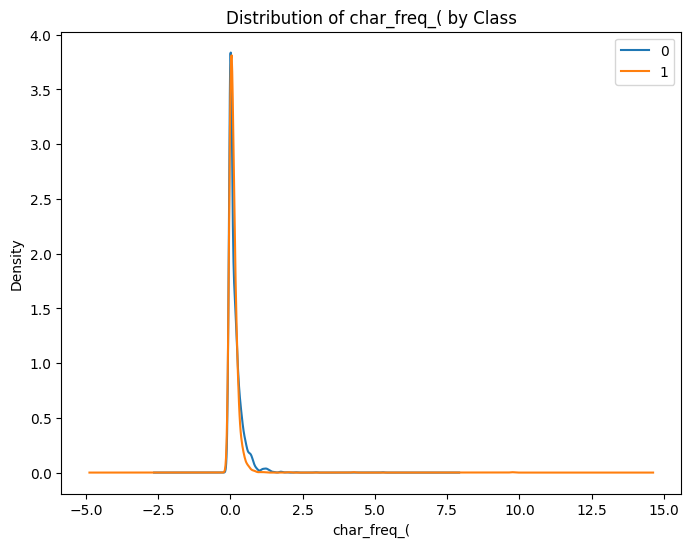

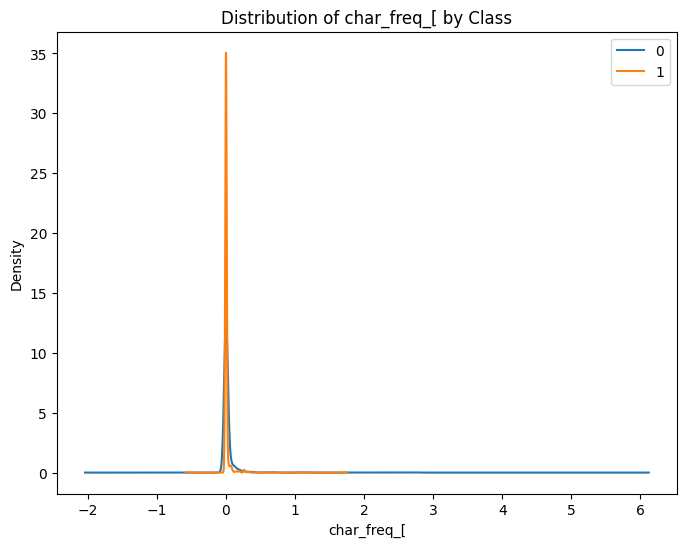

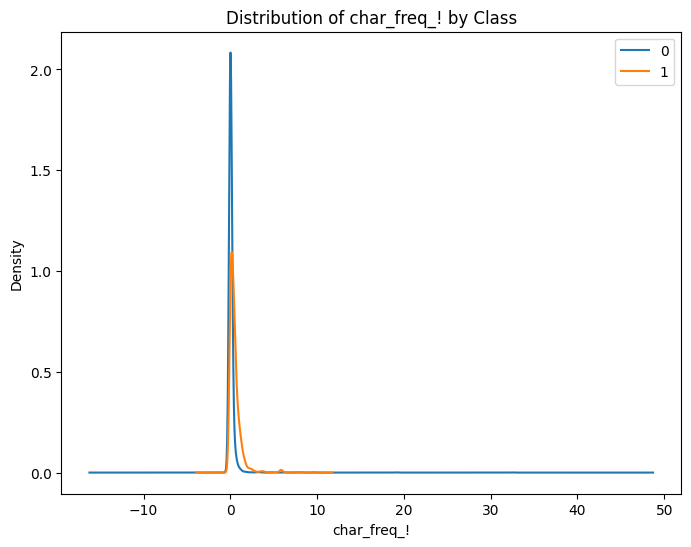

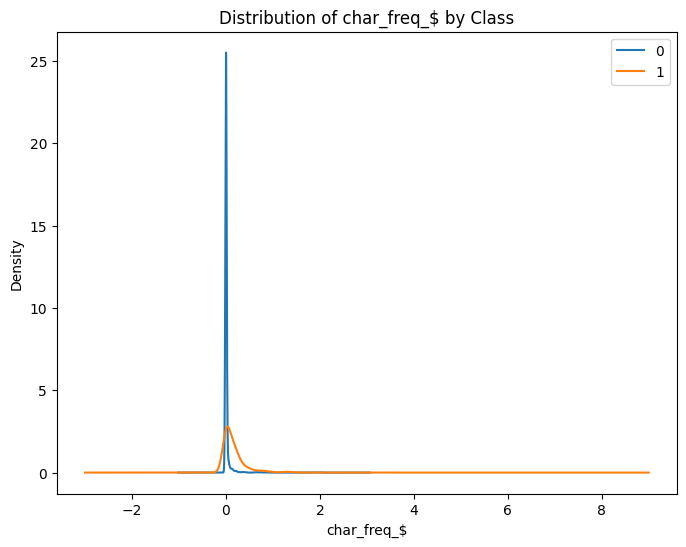

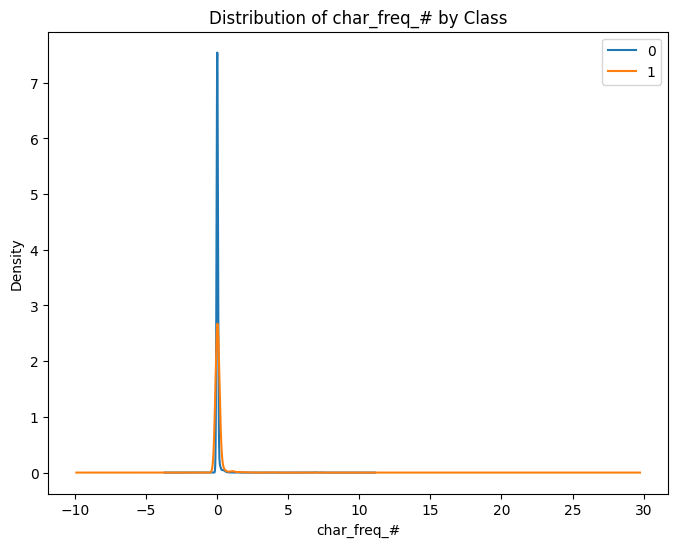

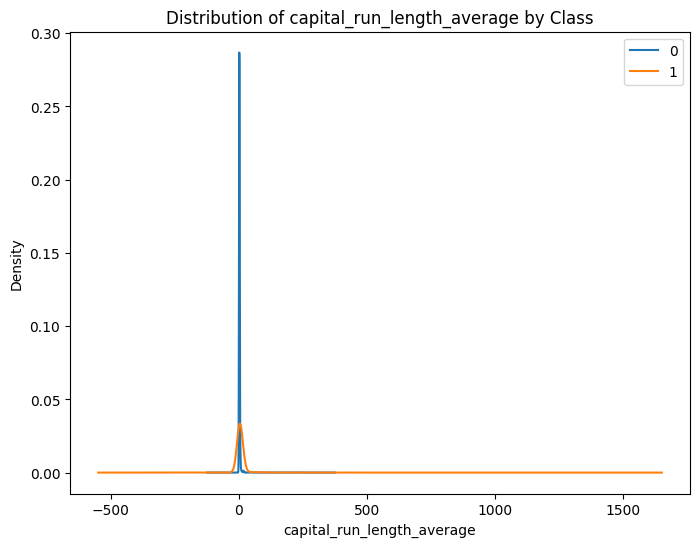

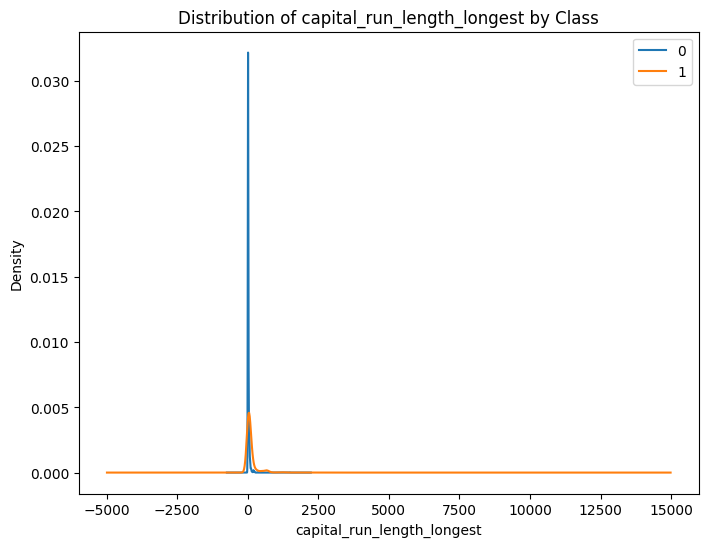

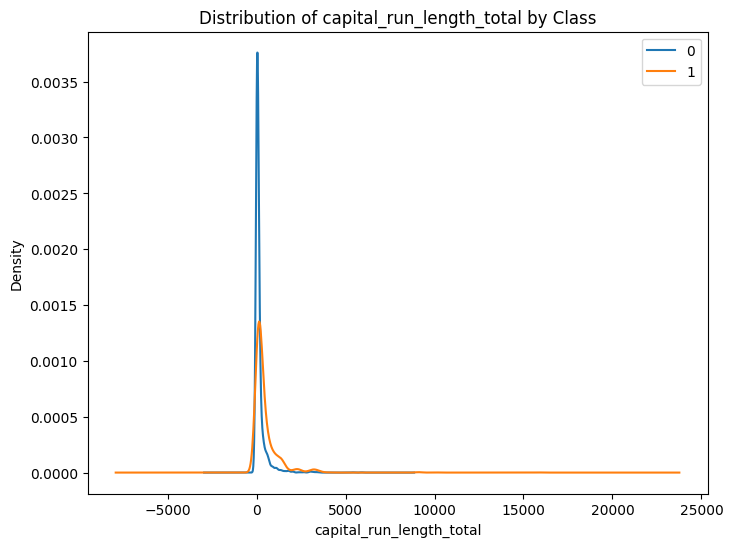

In [51]:
import matplotlib.pyplot as plt

# Group the data by the 'spam' column
grouped_data = data.groupby('spam')

# Plot histogram for each feature, grouped by class
for feature in column_names[:-1]:  # Exclude the 'spam' column
    plt.figure(figsize=(8, 6))
    for name, group in grouped_data:
        group[feature].plot(kind='density', label=name)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()

In [69]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义KFold交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 初始化性能指标的列表
accuracies = []
precisions = []
recalls = []
f1s = []

# 手动实现交叉验证
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Train the Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Train the SVM Classifier
""" # 定义想要尝试的参数值
kernel_options = ['linear', 'rbf', 'poly']
C_options = [0.1, 1, 10, 100]
gamma_options = ['scale', 'auto', 1, 0.1, 0.01, 0.001] """
svm = SVC(kernel='rbf', C=40000)
svm.fit(X_train, y_train)

# Make predictions on the testing set
nb_predictions = naive_bayes.predict(X_test)
svm_predictions = svm.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Print evaluation metrics
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)

print("\nSVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)

Naive Bayes Classifier:
Accuracy: 0.8304347826086956
Precision: 0.7075664621676891
Recall: 0.9637883008356546
F1-Score: 0.8160377358490566

SVM Classifier:
Accuracy: 0.9467391304347826
Precision: 0.9454022988505747
Recall: 0.9164345403899722
F1-Score: 0.9306930693069307
